# 参考: [Rendering OpenAi Gym in Google Colaboratory](https://star-ai.github.io/Rendering-OpenAi-Gym-in-Colaboratory/).
<!-- 
# install dependancies, takes around 45 seconds

Rendering Dependancies -->



In [1]:
from IPython import get_ipython
isColab =  'google.colab' in str(get_ipython())

In [2]:
if isColab:
    !apt-get update > /dev/null 2>&1
    !apt-get install cmake > /dev/null 2>&1
    !pip install --upgrade setuptools 2>&1
    !pip install ez_setup > /dev/null 2>&1
    !pip install gym[atari]
    #!pip install 'gym[atari]' # パックマンが含まれている    

In [3]:
if isColab:
    !pip install 'gym[classic_control]'
    !pip install 'gym[accept-rom-license]'

# Imports and Helper functions

In [ ]:
import gym
from gym import logger as gymlogger
#from gym.wrappers import Monitor
from gym.wrappers.record_video import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [5]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [6]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                        </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")
    

def wrap_env(env):
    #env = Monitor(env, './video', force=True)
    #env = gym.make('CartPole-v1', render_mode="rgb_array")
    env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
    env.reset()
    return env

In [7]:
env = wrap_env(gym.make("MsPacman-v0"))
#env = wrap_env(gym.make("CartPole-v1"))

A.L.E: Arcade Learning Environment (version 0.7.4+069f8bd)
[Powered by Stella]


In [8]:
#check out the pacman action space!
print(env.action_space)

Discrete(9)


In [9]:
observation = env.reset()

while True:
  
    env.render()
    
    #your agent goes here
    action = env.action_space.sample() 
         
    observation, reward, done, info = env.step(action) 
        
    if done:
        break;
            
env.close()
show_video()

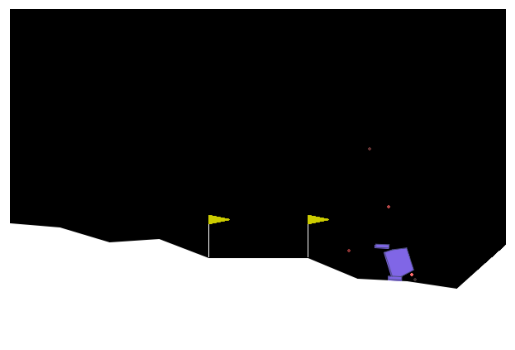

In [10]:
import typing

import gym
import matplotlib.pyplot as plt
import numpy as np
from IPython import display


# represent states as arrays and actions as ints
State = np.ndarray
Action = int

# agent is just a function!
Agent = typing.Callable[[State], Action]


def uniform_random_policy(state: State,
                          number_actions: int,
                          random_state: np.random.RandomState) -> Action:
    """Select an action at random from the set of feasible actions."""
    feasible_actions = np.arange(number_actions)
    probs = np.ones(number_actions) / number_actions
    action = random_state.choice(feasible_actions, p=probs)
    return action


def make_random_agent(number_actions: int,
                      random_state: np.random.RandomState = None) -> Agent:
    """Factory for creating an Agent."""
    _random_state = np.random.RandomState() if random_state is None else random_state
    return lambda state: uniform_random_policy(state, number_actions, _random_state)


def simulate(agent: Agent, env: gym.Env, ax: plt.Axes) -> None:
    state = env.reset()
    img = ax.imshow(env.render(mode='rgb_array'))
    done = False
    while not done:
        action = agent(state)
        img.set_data(env.render(mode='rgb_array'))
        ax.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)
    env.close()

# create the Gym environment
lunar_lander_v2 = gym.make('LunarLander-v2')
_ = lunar_lander_v2.seed(42)

# create an agent
random_agent = make_random_agent(lunar_lander_v2.action_space.n, random_state=None)

# simulate agent interacting with the environment
_, ax = plt.subplots(1, 1)
simulate(random_agent, lunar_lander_v2, ax)
